In [2]:
%pip install db-dtypes
# (if not already) also ensure:
%pip install google-cloud-bigquery

/Users/matthewdwyer/Documents/nfl_v2/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.
/Users/matthewdwyer/Documents/nfl_v2/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install google-cloud-bigquery
from google.cloud import bigquery
client = bigquery.Client(project="nfl-analytics-472221")

/Users/matthewdwyer/Documents/nfl_v2/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
import db_dtypes

plt.style.use("seaborn-v0_8")
client = bigquery.Client(project="nfl-analytics-472221")

/Users/matthewdwyer/Documents/nfl_v2/.venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


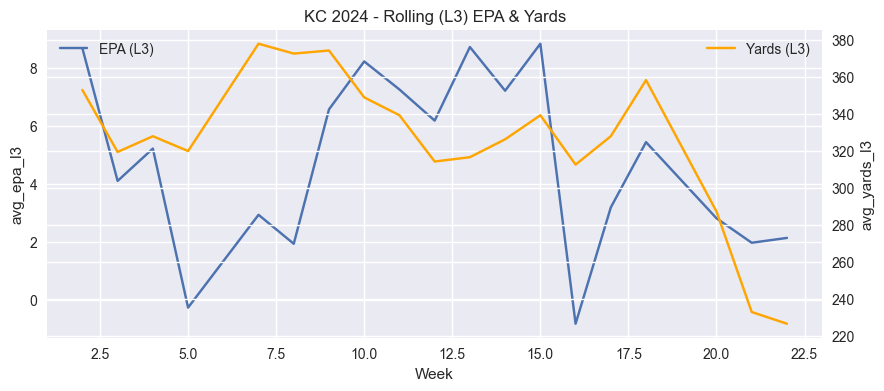

In [5]:
team = "KC"
season = 2024

q = f"""
select week, avg_epa_l3, avg_yards_l3
from `nfl-analytics-472221.nfl_data.team_week_rolling`
where team = '{team}' and season = {season}
order by week
"""
df_team = client.query(q).to_dataframe()

fig, ax1 = plt.subplots(figsize=(10,4))
sns.lineplot(data=df_team, x="week", y="avg_epa_l3", ax=ax1, label="EPA (L3)")
ax2 = ax1.twinx()
sns.lineplot(data=df_team, x="week", y="avg_yards_l3", ax=ax2, color="orange", label="Yards (L3)")
ax1.set_title(f"{team} {season} - Rolling (L3) EPA & Yards")
ax1.set_xlabel("Week")
ax1.legend(loc="upper left"); ax2.legend(loc="upper right")
plt.show()

In [7]:
season = 2024

q = f"""
select player_id, team, week, fantasy_ppr_l3
from `nfl-analytics-472221.nfl_data.player_week_rolling`
where season = {season}
qualify row_number() over (partition by player_id order by week desc) = 1
order by fantasy_ppr_l3 desc
limit 15
"""
top_players = client.query(q).to_dataframe()
top_players

/Users/matthewdwyer/Documents/nfl_v2/.venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,player_id,team,week,fantasy_ppr_l3
0,00-0039139,DET,20,32.566666
1,00-0032764,BAL,20,28.400000
2,00-0034844,PHI,22,28.233334
3,00-0039893,JAX,18,28.200000
4,00-0036410,CIN,18,26.566666
5,00-0033553,ARI,17,26.533333
6,00-0036223,IND,18,26.500000
7,00-0034855,TB,19,26.173333
8,00-0039732,DEN,19,25.473334
9,00-0036442,CIN,18,25.266666


/Users/matthewdwyer/Documents/nfl_v2/.venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


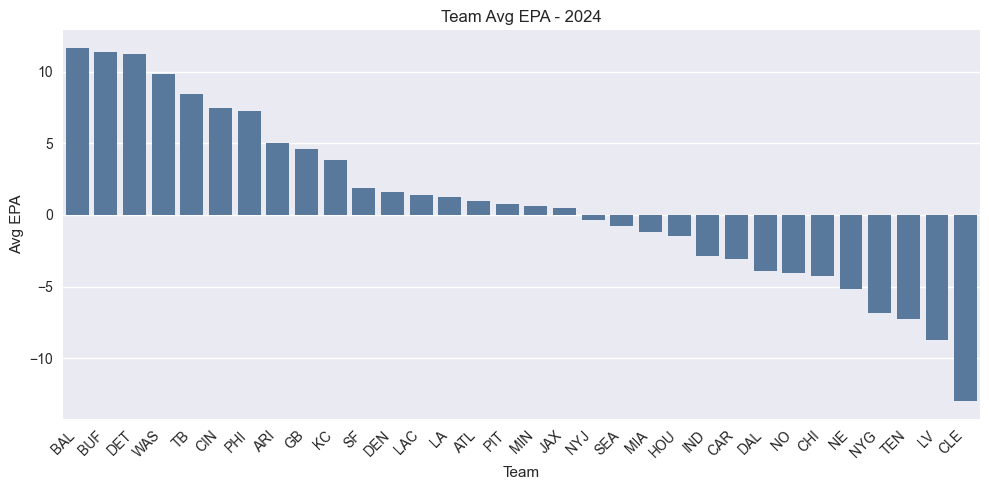

In [12]:
season = 2024

q = f"""
select team, avg_epa, avg_yards, games_played
from `nfl-analytics-472221.nfl_data.team_season_summary`
where season = {season}
order by avg_epa desc
"""
season_df = client.query(q).to_dataframe()

plt.figure(figsize=(10,5))
sns.barplot(data=season_df, x="team", y="avg_epa", color="#4C78A8")
plt.title(f"Team Avg EPA - {season}")
plt.xlabel("Team"); plt.ylabel("Avg EPA")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()

/Users/matthewdwyer/Documents/nfl_v2/.venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


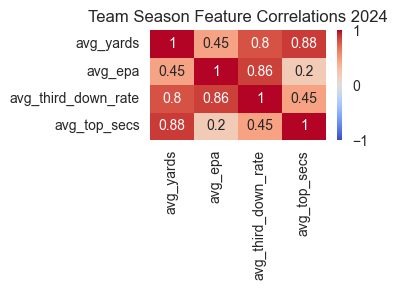

In [13]:
q = f"""
select avg_yards, avg_epa, avg_third_down_rate, avg_top_secs
from `nfl-analytics-472221.nfl_data.team_season_summary`
where season = {season}
"""
corr_df = client.query(q).to_dataframe().corr(numeric_only=True)

plt.figure(figsize=(4,3))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title(f"Team Season Feature Correlations {season}")
plt.tight_layout(); plt.show()